# SEQ Task Position Heatmap/Bar Plot 

In [9]:
from glob import glob
from scipy import stats
from math import sqrt
import nibabel as nb
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_palette('muted')

def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

#sids = ['783125', '783126']
sids = ['783125', '783126', '783127', '783128', '783129', '783130', '783131', '783132', '783133', '783134',
        '783135', '783136', '783137', '783138', '783139', '783140', '783141', '783142', '783144', '783146',
        '783147', '783148', '783149', '783150', '783151', '783152', '783153', '783154', '783155', '783156',
        '783157', '783158', '783159', '783163'] #34 subjects
proj_dir = '/home/data/madlab/data/mri/seqtrd' 
mask_filenames = []
cope_files = []
for SID in sids:
    subjmasks = glob(proj_dir + '/mask/cortical_rois/{0}/anat_masks/_subject_id_{0}/*'.format(SID))
    subjmasks.sort()
    mask_filenames.append(subjmasks)
    subjcopes = glob(proj_dir + '/frstlvl/seq_item_pos/*_pos*/' + SID + '/modelfit/contrasts/cope02_*_pos*.nii.gz')
    subjcopes.sort()
    cope_files.append(subjcopes)    
    if len(cope_files[-1]) == 0 or len(cope_files[-1]) != 17:
        print(SID)

## Cell to double-check the array indexing

In [3]:
#change first index of cope_files to indicate participant index in sids array
for i, curr_mask in enumerate(mask_filenames[0]):
    print(i, mask_filenames[0][i].split('/')[-1][:-7])

(0, 'lh-caudate_warped')
(1, 'lh-superiortemporalctx_warped')
(2, 'lh_hpc_warped')
(3, 'lh_mpfc_warped')
(4, 'limbicthal_bin_trans_warped')
(5, 'rh-caudate_warped')
(6, 'rh-superiortemporalctx_warped')
(7, 'rh_hpc_warped')
(8, 'rh_mpfc_warped')
(9, 'seq_bold_r01_dtype_despike_roi')


In [4]:
for i, curr_cope in enumerate(cope_files[0]):
    print(i, cope_files[0][i].split('/')[-1][7:-7]) 

(0, 'inseq_pos2')
(1, 'inseq_pos3')
(2, 'inseq_pos4')
(3, 'inseq_pos5')
(4, 'inseq_pos6')
(5, 'ot_pos2')
(6, 'ot_pos3')
(7, 'ot_pos4')
(8, 'ot_pos5')
(9, 'repeat_pos3')
(10, 'repeat_pos4')
(11, 'repeat_pos5')
(12, 'repeat_pos6')
(13, 'skip_pos2')
(14, 'skip_pos3')
(15, 'skip_pos4')
(16, 'skip_pos5')


### Use binarized mask to obtain activation in left & right hemisphere for each region of interest

In [11]:
inseq = {'subjid':[],
         'hp_pos2':[], 'hp_pos3':[], 'hp_pos4':[], 'hp_pos5':[], 'hp_pos6':[],  
         'mpfc_pos2':[], 'mpfc_pos3':[], 'mpfc_pos4':[], 'mpfc_pos5':[], 'mpfc_pos6':[],
         'caud_pos2':[], 'caud_pos3':[], 'caud_pos4':[], 'caud_pos5':[], 'caud_pos6':[],
         'suptemp_pos2':[], 'suptemp_pos3':[], 'suptemp_pos4':[], 'suptemp_pos5':[], 'suptemp_pos6':[]}

ot = {'subjid':[],
      'hp_pos2':[], 'hp_pos3':[], 'hp_pos4':[], 'hp_pos5':[],  
      'mpfc_pos2':[], 'mpfc_pos3':[], 'mpfc_pos4':[], 'mpfc_pos5':[],
      'caud_pos2':[], 'caud_pos3':[], 'caud_pos4':[], 'caud_pos5':[],
      'suptemp_pos2':[], 'suptemp_pos3':[], 'suptemp_pos4':[], 'suptemp_pos5':[]}

repeat = {'subjid':[],
          'hp_pos3':[], 'hp_pos4':[], 'hp_pos5':[], 'hp_pos6':[], 
          'mpfc_pos3':[], 'mpfc_pos4':[], 'mpfc_pos5':[], 'mpfc_pos6':[],
          'caud_pos3':[], 'caud_pos4':[], 'caud_pos5':[], 'caud_pos6':[],
          'suptemp_pos3':[], 'suptemp_pos4':[], 'suptemp_pos5':[], 'suptemp_pos6':[]}

skip = {'subjid':[],
        'hp_pos2':[],'hp_pos3':[], 'hp_pos4':[], 'hp_pos5':[], 
        'mpfc_pos2':[], 'mpfc_pos3':[], 'mpfc_pos4':[], 'mpfc_pos5':[],
        'caud_pos2':[], 'caud_pos3':[], 'caud_pos4':[], 'caud_pos5':[],
        'suptemp_pos2':[], 'suptemp_pos3':[], 'suptemp_pos4':[], 'suptemp_pos5':[]}
           
          
for i in range(len(sids)):
    inseq['subjid'].append(sids[i])
    ot['subjid'].append(sids[i])
    repeat['subjid'].append(sids[i])
    skip['subjid'].append(sids[i])
    lh_hp_img = nb.load(mask_filenames[i][2])
    rh_hp_img = nb.load(mask_filenames[i][7])
    lh_mpfc_img = nb.load(mask_filenames[i][3])
    rh_mpfc_img = nb.load(mask_filenames[i][8])
    lh_caud_img = nb.load(mask_filenames[i][0])
    rh_caud_img = nb.load(mask_filenames[i][5])
    lh_suptemp_img = nb.load(mask_filenames[i][1])
    rh_suptemp_img = nb.load(mask_filenames[i][6])
    
    inseq_pos2_img = nb.load(cope_files[i][0])
    inseq_pos3_img = nb.load(cope_files[i][1])
    inseq_pos4_img = nb.load(cope_files[i][2])
    inseq_pos5_img = nb.load(cope_files[i][3])
    inseq_pos6_img = nb.load(cope_files[i][4])
    ot_pos2_img = nb.load(cope_files[i][5])
    ot_pos3_img = nb.load(cope_files[i][6])
    ot_pos4_img = nb.load(cope_files[i][7])
    ot_pos5_img = nb.load(cope_files[i][8])
    repeat_pos3_img = nb.load(cope_files[i][9])
    repeat_pos4_img = nb.load(cope_files[i][10])
    repeat_pos5_img = nb.load(cope_files[i][11])
    repeat_pos6_img = nb.load(cope_files[i][12]) 
    skip_pos2_img = nb.load(cope_files[i][13])
    skip_pos3_img = nb.load(cope_files[i][14])
    skip_pos4_img = nb.load(cope_files[i][15])
    skip_pos5_img = nb.load(cope_files[i][16]) 

    pos = ['pos2', 'pos3', 'pos4', 'pos5', 'pos6']
    
    for r in ['hp', 'mpfc', 'caud', 'suptemp']:
        for d in ['inseq', 'ot', 'repeat', 'skip']:      
            if d in ['skip', 'ot']: #if a skip or ot trial
                for p in pos[:-1]: #iterate through pos2-5
                    lh_data = eval('{0}_{1}_img.get_data()[lh_{2}_img.get_data() > 0.]'.format(d,p,r))   
                    rh_data = eval('{0}_{1}_img.get_data()[rh_{2}_img.get_data() > 0.]'.format(d,p,r))
                    bihemi_data = np.concatenate((lh_data, rh_data))
                    eval('{0}["{1}_{2}"].append(bihemi_data)'.format(d,r,p))
            elif d == 'repeat':#if a repeat trial
                for p in pos[1:]: #iterate through pos3-6
                    lh_data = eval('{0}_{1}_img.get_data()[lh_{2}_img.get_data() > 0.]'.format(d,p,r))
                    rh_data = eval('{0}_{1}_img.get_data()[rh_{2}_img.get_data() > 0.]'.format(d,p,r))
                    bihemi_data = np.concatenate((lh_data, rh_data))
                    repeat['{0}_{1}'.format(r,p)].append(bihemi_data) 
            else: #if an inseq trial    
                for p in pos: #iterate through pos2-6
                    lh_data = eval('{0}_{1}_img.get_data()[lh_{2}_img.get_data() > 0.]'.format(d,p,r))
                    rh_data = eval('{0}_{1}_img.get_data()[rh_{2}_img.get_data() > 0.]'.format(d,p,r))
                    bihemi_data = np.concatenate((lh_data, rh_data))
                    inseq['{0}_{1}'.format(r,p)].append(bihemi_data)
                    
inseq_df = pd.DataFrame(inseq) 
ot_df = pd.DataFrame(ot) 
repeat_df = pd.DataFrame(repeat) 
skip_df = pd.DataFrame(skip) 

# HIPPOCAMPUS

In [79]:
inseq_hp = {}
ot_hp = {}
repeat_hp = {}
skip_hp = {}

for d in ['inseq', 'ot', 'repeat', 'skip']:
    for p in ['pos3', 'pos4', 'pos5']:
        exec('{0}_hp["{1}"] = {0}_df["hp_{1}"]'.format(d,p))
        exec('{0}_hp_df = pd.DataFrame({0}_hp)'.format(d))
#inseq_hp_df

In [76]:
HPC_raw = {'ots_diag':[], 'skips_diag':[], 'repeats_diag':[], 
           'ots_plus1':[], 'skips_plus1':[], 'repeats_plus1':[],
           'ots_less1':[], 'skips_less1':[], 'repeats_less1':[]}
HPC_avg = {'ots_diag':[], 'skips_diag':[], 'repeats_diag':[],
           'ots_plus1':[], 'skips_plus1':[], 'repeats_plus1':[],
           'ots_less1':[], 'skips_less1':[], 'repeats_less1':[]}

pos = ['3', '4', '5']
for i, sub in enumerate(sids):
    for d in ['ot', 'repeat', 'skip']:
        for p, c_pos in enumerate(pos): #correlations on diagonal
            diag = eval('stats.pearsonr({0}_hp_df["pos{1}"][{2}],inseq_hp_df["pos{1}"][{2}])[0]'.format(d,c_pos,i))
            eval('HPC_raw["{0}s_diag"].append(diag)'.format(d))
        for p, c_pos in enumerate(pos[:-1]): #correlations on above-diagonal
            plus1 = eval('stats.pearsonr({0}_hp_df["pos{1}"][{3}],inseq_hp_df["pos{2}"][{3}])[0]'.format(d,c_pos,pos[p+1],i))
            eval('HPC_raw["{0}s_plus1"].append(plus1)'.format(d))
        for p, c_pos in enumerate(pos[1:]): #correlation on below-diagonal
            less1 = eval('stats.pearsonr({0}_hp_df["pos{1}"][{3}],inseq_hp_df["pos{2}"][{3}])[0]'.format(d,c_pos,pos[p-1],i))
            eval('HPC_raw["{0}s_less1"].append(less1)'.format(d))
            
for k in range(0,102,3): #average 3 diagonal pearsons r
    HPC_avg['ots_diag'].append(np.mean(HPC_raw['ots_diag'][k:k+2]))
    HPC_avg['skips_diag'].append(np.mean(HPC_raw['skips_diag'][k:k+2]))
    HPC_avg['repeats_diag'].append(np.mean(HPC_raw['repeats_diag'][k:k+2]))
    
for j in range(0,68,2): #average 2 off-diagonal pearsons r
    HPC_avg['ots_plus1'].append(np.mean(HPC_raw['ots_plus1'][j:j+2]))
    HPC_avg['skips_plus1'].append(np.mean(HPC_raw['skips_plus1'][j:j+2]))
    HPC_avg['repeats_plus1'].append(np.mean(HPC_raw['repeats_plus1'][j:j+2]))
    HPC_avg['ots_less1'].append(np.mean(HPC_raw['ots_less1'][j:j+2]))
    HPC_avg['skips_less1'].append(np.mean(HPC_raw['skips_less1'][j:j+2]))
    HPC_avg['repeats_less1'].append(np.mean(HPC_raw['repeats_less1'][j:j+2]))
    
HPC_avg_df = pd.DataFrame(HPC_avg)

In [77]:
#These are the average diagonals per participant
HPC_avg_df

,ots_diag,ots_less1,ots_plus1,repeats_diag,repeats_less1,repeats_plus1,skips_diag,skips_less1,skips_plus1
0,0.221345,0.262278,0.393323,0.120951,0.189151,0.307715,0.154561,0.225487,0.336757
1,0.139073,0.073696,-0.022404,0.265473,0.363297,0.211530,0.283035,0.252951,0.276428
2,0.114861,0.347383,0.443316,0.093029,0.224781,0.285945,0.047385,0.152817,0.357504
3,0.585956,0.391768,0.600102,0.178504,0.251127,0.200344,0.525561,0.441442,0.567098
4,0.474395,0.522272,0.515473,0.134846,0.188129,0.222068,0.479954,0.282796,0.601109
5,0.178869,0.195848,0.300359,-0.116269,0.163721,0.116794,0.061033,-0.007449,0.150764
6,0.361795,0.412390,0.408745,0.353137,0.552803,0.424303,0.304915,0.145741,0.366408
7,0.268734,0.485032,0.420660,0.041577,0.168389,0.071634,0.157083,0.090321,0.283562
8,0.250617,0.507171,0.346098,0.175098,0.458050,0.236191,0.146031,0.345846,0.341116
9,0.329688,0.466376,0.513934,0.253638,0.453087,0.371760,0.215605,0.253955,0.326821


### Ordinal Transfers

Mean HPC ots_diag:  0.25966868198969784
STD HPC ots_diag:  0.1720903192083528
Shapiro's Test of Normality: (0.9417223334312439, 0.06938635557889938)
--------
Mean HPC ots_plus1:  0.3696809722220196
STD HPC ots_plus1:  0.1412544595690094
Shapiro's Test of Normality: (0.959678053855896, 0.2379574030637741)
--------
Mean HPC ots_less1:  0.34745244879056425
STD HPC ots_less1:  0.1523752841737296
Shapiro's Test of Normality: (0.975433886051178, 0.6253882646560669)
--------


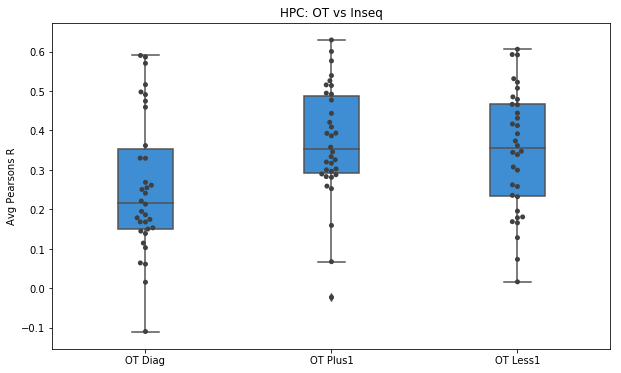

In [84]:
for key in ['ots_diag', 'ots_plus1', 'ots_less1']:
    print "Mean HPC {0}: ".format(key), np.mean(HPC_avg_df['{0}'.format(key)])
    print "STD HPC {0}: ".format(key), np.std(HPC_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(HPC_avg_df['{0}'.format(key)])
    print "--------"
N = 3
conditions = ['OT Diag', 'OT Plus1', 'OT Less1']
hp_allsubjs = [HPC_avg_df['ots_diag'], HPC_avg_df['ots_plus1'], HPC_avg_df['ots_less1']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("HPC: OT vs Inseq")
plt.show()

### Repeats

Mean HPC repeats_diag:  0.2307042269693578
STD HPC repeats_diag:  0.16216820931161322
Shapiro's Test of Normality: (0.9742013216018677, 0.5861502885818481)
--------
Mean HPC repeats_plus1:  0.320702455499593
STD HPC repeats_plus1:  0.13618658590892233
Shapiro's Test of Normality: (0.9841777682304382, 0.8918461203575134)
--------
Mean HPC repeats_less1:  0.33894947143819404
STD HPC repeats_less1:  0.1735340557626278
Shapiro's Test of Normality: (0.956935703754425, 0.19766367971897125)
--------


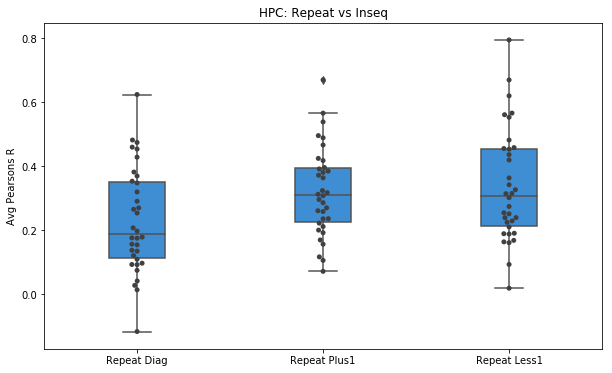

In [85]:
for key in ['repeats_diag', 'repeats_plus1', 'repeats_less1']:
    print "Mean HPC {0}: ".format(key), np.mean(HPC_avg_df['{0}'.format(key)])
    print "STD HPC {0}: ".format(key), np.std(HPC_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(HPC_avg_df['{0}'.format(key)])
    print "--------"
N = 3
conditions = ['Repeat Diag', 'Repeat Plus1', 'Repeat Less1']
hp_allsubjs = [HPC_avg_df['repeats_diag'], HPC_avg_df['repeats_plus1'], HPC_avg_df['repeats_less1']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("HPC: Repeat vs Inseq")
plt.show()

### Skips

Mean HPC skips_diag:  0.28034521748914437
STD HPC skips_diag:  0.18041408463592692
Shapiro's Test of Normality: (0.9441851377487183, 0.08220288157463074)
--------
Mean HPC skips_plus1:  0.3965231167042957
STD HPC skips_plus1:  0.14458092801329311
Shapiro's Test of Normality: (0.9389389753341675, 0.05732950568199158)
--------
Mean HPC skips_less1:  0.28258881652179885
STD HPC skips_less1:  0.12785818314122843
Shapiro's Test of Normality: (0.9899075627326965, 0.9851217269897461)
--------


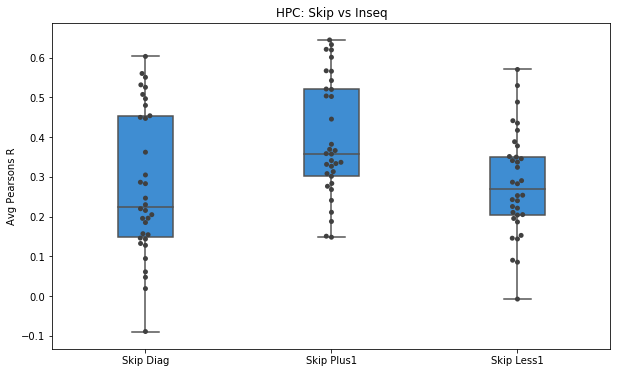

In [86]:
for key in ['skips_diag', 'skips_plus1', 'skips_less1']:
    print "Mean HPC {0}: ".format(key), np.mean(HPC_avg_df['{0}'.format(key)])
    print "STD HPC {0}: ".format(key), np.std(HPC_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(HPC_avg_df['{0}'.format(key)])
    print "--------"
N = 3
conditions = ['Skip Diag', 'Skip Plus1', 'Skip Less1']
hp_allsubjs = [HPC_avg_df['skips_diag'], HPC_avg_df['skips_plus1'], HPC_avg_df['skips_less1']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = hp_allsubjs, color = "#278fea", width = 0.3)
ax2 = sns.swarmplot(data = hp_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("HPC: Skip vs Inseq")
plt.show()

# MEDIAL PREFRONTAL CORTEX

In [89]:
inseq_mpfc = {}
ot_mpfc = {}
repeat_mpfc = {}
skip_mpfc = {}

for d in ['inseq', 'ot', 'repeat', 'skip']:
    for p in ['pos3', 'pos4', 'pos5']:
        exec('{0}_mpfc["{1}"] = {0}_df["mpfc_{1}"]'.format(d,p))
        exec('{0}_mpfc_df = pd.DataFrame({0}_mpfc)'.format(d))
#inseq_mpfc_df

In [90]:
MPFC_raw = {'ots_diag':[], 'skips_diag':[], 'repeats_diag':[], 
           'ots_plus1':[], 'skips_plus1':[], 'repeats_plus1':[],
           'ots_less1':[], 'skips_less1':[], 'repeats_less1':[]}
MPFC_avg = {'ots_diag':[], 'skips_diag':[], 'repeats_diag':[],
           'ots_plus1':[], 'skips_plus1':[], 'repeats_plus1':[],
           'ots_less1':[], 'skips_less1':[], 'repeats_less1':[]}

pos = ['3', '4', '5']
for i, sub in enumerate(sids):
    for d in ['ot', 'repeat', 'skip']:
        for p, c_pos in enumerate(pos): #correlations on diagonal
            diag = eval('stats.pearsonr({0}_mpfc_df["pos{1}"][{2}],inseq_mpfc_df["pos{1}"][{2}])[0]'.format(d,c_pos,i))
            eval('MPFC_raw["{0}s_diag"].append(diag)'.format(d))
        for p, c_pos in enumerate(pos[:-1]): #correlations on above-diagonal
            plus1 = eval('stats.pearsonr({0}_mpfc_df["pos{1}"][{3}],inseq_mpfc_df["pos{2}"][{3}])[0]'.format(d,c_pos,pos[p+1],i))
            eval('MPFC_raw["{0}s_plus1"].append(plus1)'.format(d))
        for p, c_pos in enumerate(pos[1:]): #correlation on below-diagonal
            less1 = eval('stats.pearsonr({0}_mpfc_df["pos{1}"][{3}],inseq_mpfc_df["pos{2}"][{3}])[0]'.format(d,c_pos,pos[p-1],i))
            eval('MPFC_raw["{0}s_less1"].append(less1)'.format(d))
            
for k in range(0,102,3): #average 3 diagonal pearsons r
    MPFC_avg['ots_diag'].append(np.mean(MPFC_raw['ots_diag'][k:k+2]))
    MPFC_avg['skips_diag'].append(np.mean(MPFC_raw['skips_diag'][k:k+2]))
    MPFC_avg['repeats_diag'].append(np.mean(MPFC_raw['repeats_diag'][k:k+2]))
    
for j in range(0,68,2): #average 2 off-diagonal pearsons r
    MPFC_avg['ots_plus1'].append(np.mean(MPFC_raw['ots_plus1'][j:j+2]))
    MPFC_avg['skips_plus1'].append(np.mean(MPFC_raw['skips_plus1'][j:j+2]))
    MPFC_avg['repeats_plus1'].append(np.mean(MPFC_raw['repeats_plus1'][j:j+2]))
    MPFC_avg['ots_less1'].append(np.mean(MPFC_raw['ots_less1'][j:j+2]))
    MPFC_avg['skips_less1'].append(np.mean(MPFC_raw['skips_less1'][j:j+2]))
    MPFC_avg['repeats_less1'].append(np.mean(MPFC_raw['repeats_less1'][j:j+2]))
    
MPFC_avg_df = pd.DataFrame(MPFC_avg)

In [91]:
#These are the average diagonals per participant
MPFC_avg_df

,ots_diag,ots_less1,ots_plus1,repeats_diag,repeats_less1,repeats_plus1,skips_diag,skips_less1,skips_plus1
0,0.304306,0.387577,0.376995,0.009466,0.025053,0.153938,0.174536,0.262265,0.325007
1,0.086554,0.186123,0.127813,0.102635,0.120929,0.040525,0.191071,0.049898,0.143953
2,0.173271,0.392478,0.327388,0.292483,0.396142,0.359320,0.175701,0.338963,0.445941
3,0.606386,0.390909,0.623825,0.235547,0.326429,0.264081,0.592026,0.525937,0.638540
4,0.535196,0.607603,0.580710,0.227762,0.143000,0.282233,0.607423,0.310632,0.669491
5,0.076197,0.216477,0.186458,-0.067318,0.098815,0.014971,-0.085454,0.053095,0.139182
6,0.359194,0.414104,0.395777,0.584360,0.586008,0.584787,0.509002,0.403594,0.564030
7,0.159576,0.296026,0.248747,0.248736,0.230382,0.274908,0.055450,0.068417,0.025751
8,0.119357,0.308597,0.176017,0.073308,0.532269,0.129760,0.297576,0.410564,0.472399
9,0.444449,0.405928,0.549671,0.374781,0.482586,0.455769,0.238750,0.270502,0.380708


### Ordinal Transfers

Mean MPFC ots_diag:  0.27917178659973774
STD MPFC ots_diag:  0.19247488487428477
Shapiro's Test of Normality: (0.9531787037849426, 0.1528499871492386)
--------
Mean MPFC ots_plus1:  0.36521101764896335
STD MPFC ots_plus1:  0.1629413027019126
Shapiro's Test of Normality: (0.9442393779754639, 0.08251074701547623)
--------
Mean MPFC ots_less1:  0.3668356810641639
STD MPFC ots_less1:  0.1594986327844601
Shapiro's Test of Normality: (0.9916996955871582, 0.9950698018074036)
--------


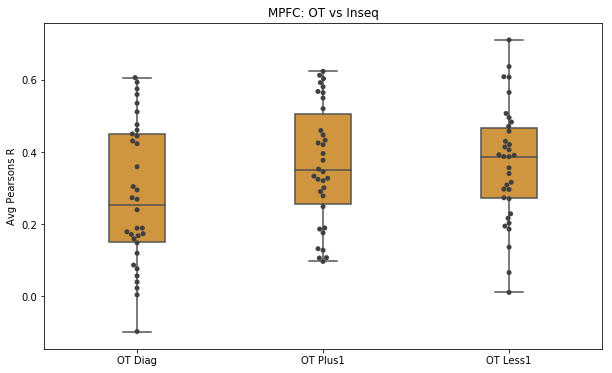

In [114]:
for key in ['ots_diag', 'ots_plus1', 'ots_less1']:
    print "Mean MPFC {0}: ".format(key), np.mean(MPFC_avg_df['{0}'.format(key)])
    print "STD MPFC {0}: ".format(key), np.std(MPFC_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(MPFC_avg_df['{0}'.format(key)])
    print "--------"
N = 3
conditions = ['OT Diag', 'OT Plus1', 'OT Less1']
mpfc_allsubjs = [MPFC_avg_df['ots_diag'], MPFC_avg_df['ots_plus1'], MPFC_avg_df['ots_less1']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = mpfc_allsubjs, color = "#e89b27", width = 0.3)
ax2 = sns.swarmplot(data = mpfc_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("MPFC: OT vs Inseq")
plt.show()

### Repeats

Mean MPFC repeats_diag:  0.24831483545987046
STD MPFC repeats_diag:  0.16760773419066524
Shapiro's Test of Normality: (0.9765557646751404, 0.6616843938827515)
--------
Mean MPFC repeats_plus1:  0.32656845450401306
STD MPFC repeats_plus1:  0.15026969883873637
Shapiro's Test of Normality: (0.9780842065811157, 0.7114226818084717)
--------
Mean MPFC repeats_less1:  0.35735954760628585
STD MPFC repeats_less1:  0.17237878459393596
Shapiro's Test of Normality: (0.970676064491272, 0.48036596179008484)
--------


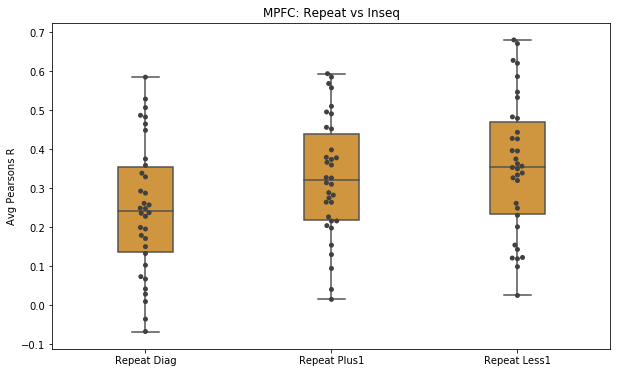

In [113]:
for key in ['repeats_diag', 'repeats_plus1', 'repeats_less1']:
    print "Mean MPFC {0}: ".format(key), np.mean(MPFC_avg_df['{0}'.format(key)])
    print "STD MPFC {0}: ".format(key), np.std(MPFC_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(MPFC_avg_df['{0}'.format(key)])
    print "--------"
N = 3
conditions = ['Repeat Diag', 'Repeat Plus1', 'Repeat Less1']
mpfc_allsubjs = [MPFC_avg_df['repeats_diag'], MPFC_avg_df['repeats_plus1'], MPFC_avg_df['repeats_less1']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = mpfc_allsubjs, color = "#e89b27", width = 0.3)
ax2 = sns.swarmplot(data = mpfc_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("MPFC: Repeat vs Inseq")
plt.show()

### Skips

Mean MPFC skips_diag:  0.31226619887713564
STD MPFC skips_diag:  0.23117594147767095
Shapiro's Test of Normality: (0.9571331739425659, 0.20033688843250275)
--------
Mean MPFC skips_plus1:  0.4095237028291997
STD MPFC skips_plus1:  0.19073190442108126
Shapiro's Test of Normality: (0.95579594373703, 0.18288423120975494)
--------
Mean MPFC skips_less1:  0.29981069540714517
STD MPFC skips_less1:  0.15465191361595307
Shapiro's Test of Normality: (0.9682088494300842, 0.41388264298439026)
--------


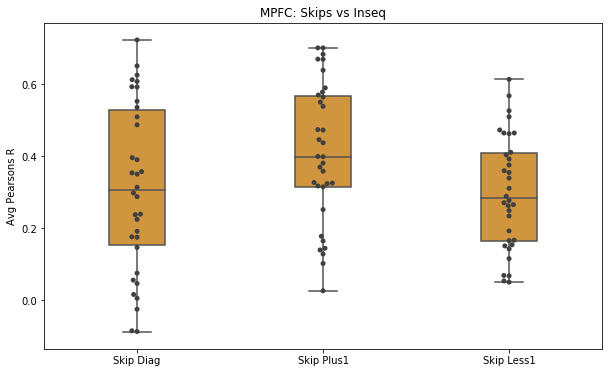

In [112]:
for key in ['skips_diag', 'skips_plus1', 'skips_less1']:
    print "Mean MPFC {0}: ".format(key), np.mean(MPFC_avg_df['{0}'.format(key)])
    print "STD MPFC {0}: ".format(key), np.std(MPFC_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(MPFC_avg_df['{0}'.format(key)])
    print "--------"
N = 3
conditions = ['Skip Diag', 'Skip Plus1', 'Skip Less1']
mpfc_allsubjs = [MPFC_avg_df['skips_diag'], MPFC_avg_df['skips_plus1'], MPFC_avg_df['skips_less1']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = mpfc_allsubjs, color = "#e89b27", width = 0.3)
ax2 = sns.swarmplot(data = mpfc_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("MPFC: Skips vs Inseq")
plt.show()

# CAUDATE

In [96]:
inseq_caud = {}
ot_caud = {}
repeat_caud = {}
skip_caud = {}

for d in ['inseq', 'ot', 'repeat', 'skip']:
    for p in ['pos3', 'pos4', 'pos5']:
        exec('{0}_caud["{1}"] = {0}_df["caud_{1}"]'.format(d,p))
        exec('{0}_caud_df = pd.DataFrame({0}_caud)'.format(d))
#inseq_caud_df

In [98]:
CAUD_raw = {'ots_diag':[], 'skips_diag':[], 'repeats_diag':[], 
            'ots_plus1':[], 'skips_plus1':[], 'repeats_plus1':[],
            'ots_less1':[], 'skips_less1':[], 'repeats_less1':[]}
CAUD_avg = {'ots_diag':[], 'skips_diag':[], 'repeats_diag':[],
            'ots_plus1':[], 'skips_plus1':[], 'repeats_plus1':[],
            'ots_less1':[], 'skips_less1':[], 'repeats_less1':[]}

pos = ['3', '4', '5']
for i, sub in enumerate(sids):
    for d in ['ot', 'repeat', 'skip']:
        for p, c_pos in enumerate(pos): #correlations on diagonal
            diag = eval('stats.pearsonr({0}_caud_df["pos{1}"][{2}],inseq_caud_df["pos{1}"][{2}])[0]'.format(d,c_pos,i))
            eval('CAUD_raw["{0}s_diag"].append(diag)'.format(d))
        for p, c_pos in enumerate(pos[:-1]): #correlations on above-diagonal
            plus1 = eval('stats.pearsonr({0}_caud_df["pos{1}"][{3}],inseq_caud_df["pos{2}"][{3}])[0]'.format(d,c_pos,pos[p+1],i))
            eval('CAUD_raw["{0}s_plus1"].append(plus1)'.format(d))
        for p, c_pos in enumerate(pos[1:]): #correlation on below-diagonal
            less1 = eval('stats.pearsonr({0}_caud_df["pos{1}"][{3}],inseq_caud_df["pos{2}"][{3}])[0]'.format(d,c_pos,pos[p-1],i))
            eval('CAUD_raw["{0}s_less1"].append(less1)'.format(d))
            
for k in range(0,102,3): #average 3 diagonal pearsons r
    CAUD_avg['ots_diag'].append(np.mean(CAUD_raw['ots_diag'][k:k+2]))
    CAUD_avg['skips_diag'].append(np.mean(CAUD_raw['skips_diag'][k:k+2]))
    CAUD_avg['repeats_diag'].append(np.mean(CAUD_raw['repeats_diag'][k:k+2]))
    
for j in range(0,68,2): #average 2 off-diagonal pearsons r
    CAUD_avg['ots_plus1'].append(np.mean(CAUD_raw['ots_plus1'][j:j+2]))
    CAUD_avg['skips_plus1'].append(np.mean(CAUD_raw['skips_plus1'][j:j+2]))
    CAUD_avg['repeats_plus1'].append(np.mean(CAUD_raw['repeats_plus1'][j:j+2]))
    CAUD_avg['ots_less1'].append(np.mean(CAUD_raw['ots_less1'][j:j+2]))
    CAUD_avg['skips_less1'].append(np.mean(CAUD_raw['skips_less1'][j:j+2]))
    CAUD_avg['repeats_less1'].append(np.mean(CAUD_raw['repeats_less1'][j:j+2]))
    
CAUD_avg_df = pd.DataFrame(CAUD_avg)

In [99]:
#These are the average diagonals per participant
CAUD_avg_df

,ots_diag,ots_less1,ots_plus1,repeats_diag,repeats_less1,repeats_plus1,skips_diag,skips_less1,skips_plus1
0,0.218430,0.453256,0.393820,0.151023,0.150778,0.337611,-0.022546,0.265679,0.136846
1,0.033567,0.090979,0.116368,-0.092913,0.248030,0.049469,0.074746,0.322649,0.253273
2,0.018779,0.337304,0.237581,0.172170,0.248085,0.202583,0.163974,0.137473,0.312464
3,0.572980,0.411258,0.618120,0.257416,0.315114,0.300710,0.451805,0.411096,0.529465
4,0.380412,0.541697,0.455117,0.004004,0.061941,0.132450,0.476620,0.305763,0.594536
5,0.226352,0.321749,0.325321,0.017494,0.251580,0.144196,0.076768,0.062227,0.116646
6,0.332107,0.354816,0.389317,0.342676,0.479477,0.418179,0.376404,0.277911,0.490882
7,0.254177,0.344923,0.297040,0.106342,0.215603,0.158171,0.197074,0.220578,0.176791
8,0.305699,0.300858,0.396405,0.298491,0.408566,0.291444,0.055973,0.213478,0.238233
9,0.368497,0.364141,0.450880,0.221678,0.386984,0.305636,0.242452,0.177128,0.336945


### Ordinal Transfers

Mean CAUD ots_diag:  0.2411650735884905
STD CAUD ots_diag:  0.19599761486931042
Shapiro's Test of Normality: (0.9636520147323608, 0.3097057640552521)
--------
Mean CAUD ots_plus1:  0.3534788471810958
STD CAUD ots_plus1:  0.1588703380537
Shapiro's Test of Normality: (0.974773645401001, 0.6042640209197998)
--------
Mean CAUD ots_less1:  0.3357219387064962
STD CAUD ots_less1:  0.1612110219312553
Shapiro's Test of Normality: (0.9634599089622498, 0.3058422803878784)
--------


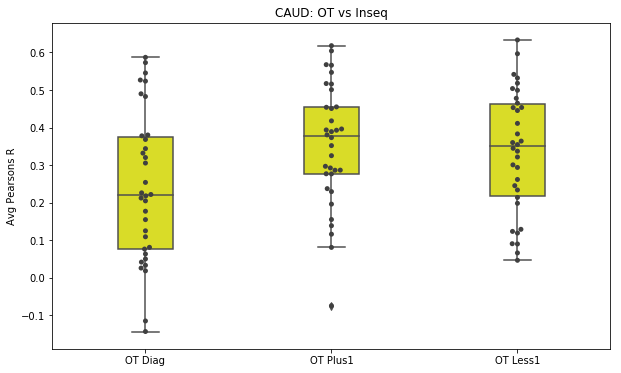

In [111]:
for key in ['ots_diag', 'ots_plus1', 'ots_less1']:
    print "Mean CAUD {0}: ".format(key), np.mean(CAUD_avg_df['{0}'.format(key)])
    print "STD CAUD {0}: ".format(key), np.std(CAUD_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(CAUD_avg_df['{0}'.format(key)])
    print "--------"
N = 3
conditions = ['OT Diag', 'OT Plus1', 'OT Less1']
caud_allsubjs = [CAUD_avg_df['ots_diag'], CAUD_avg_df['ots_plus1'], CAUD_avg_df['ots_less1']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = caud_allsubjs, color = "#f6fa0a", width = 0.3)
ax2 = sns.swarmplot(data = caud_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("CAUD: OT vs Inseq")
plt.show()

### Repeats

Mean CAUD repeats_diag:  0.2099892548559343
STD CAUD repeats_diag:  0.18974316818787834
Shapiro's Test of Normality: (0.9478139281272888, 0.10559012740850449)
--------
Mean CAUD repeats_plus1:  0.3149118734633221
STD CAUD repeats_plus1:  0.14730681609403104
Shapiro's Test of Normality: (0.9581002593040466, 0.2139267474412918)
--------
Mean CAUD repeats_less1:  0.3267238381154397
STD CAUD repeats_less1:  0.17383307001782797
Shapiro's Test of Normality: (0.928792417049408, 0.028853420168161392)
--------


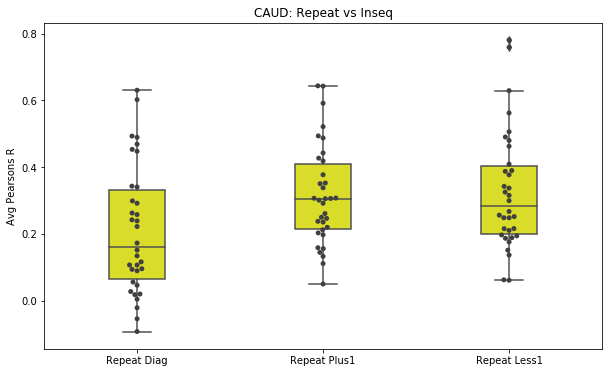

In [110]:
for key in ['repeats_diag', 'repeats_plus1', 'repeats_less1']:
    print "Mean CAUD {0}: ".format(key), np.mean(CAUD_avg_df['{0}'.format(key)])
    print "STD CAUD {0}: ".format(key), np.std(CAUD_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(CAUD_avg_df['{0}'.format(key)])
    print "--------"
N = 3
conditions = ['Repeat Diag', 'Repeat Plus1', 'Repeat Less1']
caud_allsubjs = [CAUD_avg_df['repeats_diag'], CAUD_avg_df['repeats_plus1'], CAUD_avg_df['repeats_less1']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = caud_allsubjs, color = "#f6fa0a", width = 0.3)
ax2 = sns.swarmplot(data = caud_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("CAUD: Repeat vs Inseq")
plt.show()

### Skips

Mean CAUD skips_diag:  0.24563530120341218
STD CAUD skips_diag:  0.20411078232064533
Shapiro's Test of Normality: (0.9148539304733276, 0.011590872891247272)
--------
Mean CAUD skips_plus1:  0.36708174098063917
STD CAUD skips_plus1:  0.17023755587258843
Shapiro's Test of Normality: (0.946194589138031, 0.09442263841629028)
--------
Mean CAUD skips_less1:  0.28451227057067785
STD CAUD skips_less1:  0.12574470590267775
Shapiro's Test of Normality: (0.97455233335495, 0.5972354412078857)
--------


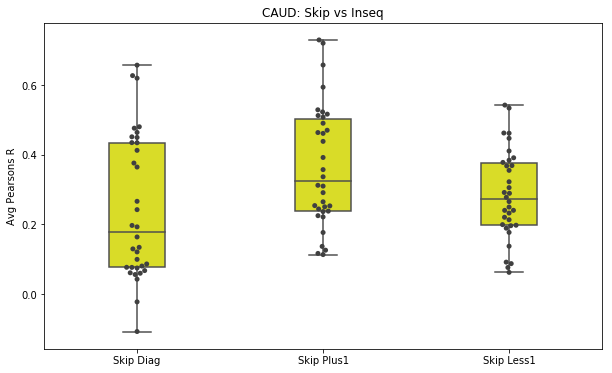

In [109]:
for key in ['skips_diag', 'skips_plus1', 'skips_less1']:
    print "Mean CAUD {0}: ".format(key), np.mean(CAUD_avg_df['{0}'.format(key)])
    print "STD CAUD {0}: ".format(key), np.std(CAUD_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(CAUD_avg_df['{0}'.format(key)])
    print "--------"
N = 3
conditions = ['Skip Diag', 'Skip Plus1', 'Skip Less1']
caud_allsubjs = [CAUD_avg_df['skips_diag'], CAUD_avg_df['skips_plus1'], CAUD_avg_df['skips_less1']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = caud_allsubjs, color = "#f6fa0a", width = 0.3)
ax2 = sns.swarmplot(data = caud_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("CAUD: Skip vs Inseq")
plt.show()

# Superior Temporal Gyrus

In [103]:
inseq_suptemp = {}
ot_suptemp = {}
repeat_suptemp = {}
skip_suptemp = {}

for d in ['inseq', 'ot', 'repeat', 'skip']:
    for p in ['pos3', 'pos4', 'pos5']:
        exec('{0}_suptemp["{1}"] = {0}_df["suptemp_{1}"]'.format(d,p))
        exec('{0}_suptemp_df = pd.DataFrame({0}_suptemp)'.format(d))
#inseq_suptemp_df

In [105]:
STEM_raw = {'ots_diag':[], 'skips_diag':[], 'repeats_diag':[], 
            'ots_plus1':[], 'skips_plus1':[], 'repeats_plus1':[],
            'ots_less1':[], 'skips_less1':[], 'repeats_less1':[]}
STEM_avg = {'ots_diag':[], 'skips_diag':[], 'repeats_diag':[],
            'ots_plus1':[], 'skips_plus1':[], 'repeats_plus1':[],
            'ots_less1':[], 'skips_less1':[], 'repeats_less1':[]}

pos = ['3', '4', '5']
for i, sub in enumerate(sids):
    for d in ['ot', 'repeat', 'skip']:
        for p, c_pos in enumerate(pos): #correlations on diagonal
            diag = eval('stats.pearsonr({0}_suptemp_df["pos{1}"][{2}],inseq_suptemp_df["pos{1}"][{2}])[0]'.format(d,c_pos,i))
            eval('STEM_raw["{0}s_diag"].append(diag)'.format(d))
        for p, c_pos in enumerate(pos[:-1]): #correlations on above-diagonal
            plus1 = eval('stats.pearsonr({0}_suptemp_df["pos{1}"][{3}],inseq_suptemp_df["pos{2}"][{3}])[0]'.format(d,c_pos,pos[p+1],i))
            eval('STEM_raw["{0}s_plus1"].append(plus1)'.format(d))
        for p, c_pos in enumerate(pos[1:]): #correlation on below-diagonal
            less1 = eval('stats.pearsonr({0}_suptemp_df["pos{1}"][{3}],inseq_suptemp_df["pos{2}"][{3}])[0]'.format(d,c_pos,pos[p-1],i))
            eval('STEM_raw["{0}s_less1"].append(less1)'.format(d))
            
for k in range(0,102,3): #average 3 diagonal pearsons r
    STEM_avg['ots_diag'].append(np.mean(STEM_raw['ots_diag'][k:k+2]))
    STEM_avg['skips_diag'].append(np.mean(STEM_raw['skips_diag'][k:k+2]))
    STEM_avg['repeats_diag'].append(np.mean(STEM_raw['repeats_diag'][k:k+2]))
    
for j in range(0,68,2): #average 2 off-diagonal pearsons r
    STEM_avg['ots_plus1'].append(np.mean(STEM_raw['ots_plus1'][j:j+2]))
    STEM_avg['skips_plus1'].append(np.mean(STEM_raw['skips_plus1'][j:j+2]))
    STEM_avg['repeats_plus1'].append(np.mean(STEM_raw['repeats_plus1'][j:j+2]))
    STEM_avg['ots_less1'].append(np.mean(STEM_raw['ots_less1'][j:j+2]))
    STEM_avg['skips_less1'].append(np.mean(STEM_raw['skips_less1'][j:j+2]))
    STEM_avg['repeats_less1'].append(np.mean(STEM_raw['repeats_less1'][j:j+2]))
    
STEM_avg_df = pd.DataFrame(STEM_avg)

In [106]:
#These are the average diagonals per participant
STEM_avg_df

,ots_diag,ots_less1,ots_plus1,repeats_diag,repeats_less1,repeats_plus1,skips_diag,skips_less1,skips_plus1
0,0.229691,0.476505,0.409876,0.000152,0.057351,0.210458,0.217579,0.148697,0.203079
1,0.072790,0.064632,0.041802,0.106834,0.267507,0.117053,0.161934,0.073440,0.133940
2,0.205781,0.412901,0.408417,0.230343,0.300091,0.336306,0.112140,0.166723,0.382721
3,0.567463,0.285738,0.584043,0.278703,0.378518,0.380730,0.563210,0.519628,0.639052
4,0.468268,0.624113,0.540810,-0.014286,-0.123323,0.040242,0.409446,0.273518,0.562137
5,0.211079,0.383804,0.423041,0.076504,0.141061,0.256610,-0.073256,0.210415,0.159134
6,0.287292,0.290750,0.308019,0.340703,0.407247,0.392653,0.502039,0.359836,0.583658
7,0.246131,0.417893,0.319528,0.086531,0.069170,0.159323,0.029624,0.078364,0.120976
8,0.360911,0.543241,0.481352,0.084699,0.574233,0.147905,0.311467,0.448587,0.465212
9,0.429243,0.399867,0.552243,0.299607,0.378337,0.371436,0.210838,0.223134,0.338238


### Ordinal Transfers

Mean STEM ots_diag:  0.28548360002391476
STD STEM ots_diag:  0.17714511913422065
Shapiro's Test of Normality: (0.9542284607887268, 0.16427549719810486)
--------
Mean STEM ots_plus1:  0.4042536597698927
STD STEM ots_plus1:  0.14626750126323057
Shapiro's Test of Normality: (0.9777274131774902, 0.6998226046562195)
--------
Mean STEM ots_less1:  0.38044781456975374
STD STEM ots_less1:  0.14159851183732627
Shapiro's Test of Normality: (0.972755491733551, 0.5414273738861084)
--------


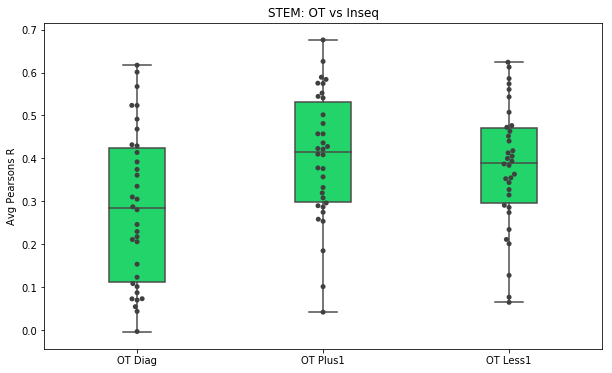

In [108]:
for key in ['ots_diag', 'ots_plus1', 'ots_less1']:
    print "Mean STEM {0}: ".format(key), np.mean(STEM_avg_df['{0}'.format(key)])
    print "STD STEM {0}: ".format(key), np.std(STEM_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(STEM_avg_df['{0}'.format(key)])
    print "--------"
N = 3
conditions = ['OT Diag', 'OT Plus1', 'OT Less1']
stem_allsubjs = [STEM_avg_df['ots_diag'], STEM_avg_df['ots_plus1'], STEM_avg_df['ots_less1']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = stem_allsubjs, color = "#05f264", width = 0.3)
ax2 = sns.swarmplot(data = stem_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("STEM: OT vs Inseq")
plt.show()

### Repeats

Mean STEM repeats_diag:  0.23840599627617529
STD STEM repeats_diag:  0.1606255695646599
Shapiro's Test of Normality: (0.9687178134918213, 0.42703181505203247)
--------
Mean STEM repeats_plus1:  0.3303279245600981
STD STEM repeats_plus1:  0.1459173225132869
Shapiro's Test of Normality: (0.9818059206008911, 0.8277609348297119)
--------
Mean STEM repeats_less1:  0.3330976390553748
STD STEM repeats_less1:  0.1920239338109266
Shapiro's Test of Normality: (0.9921154975891113, 0.9964035153388977)
--------


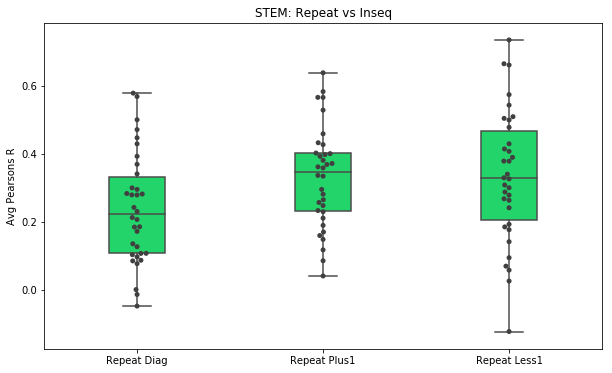

In [115]:
for key in ['repeats_diag', 'repeats_plus1', 'repeats_less1']:
    print "Mean STEM {0}: ".format(key), np.mean(STEM_avg_df['{0}'.format(key)])
    print "STD STEM {0}: ".format(key), np.std(STEM_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(STEM_avg_df['{0}'.format(key)])
    print "--------"
N = 3
conditions = ['Repeat Diag', 'Repeat Plus1', 'Repeat Less1']
stem_allsubjs = [STEM_avg_df['repeats_diag'], STEM_avg_df['repeats_plus1'], STEM_avg_df['repeats_less1']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = stem_allsubjs, color = "#05f264", width = 0.3)
ax2 = sns.swarmplot(data = stem_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("STEM: Repeat vs Inseq")
plt.show()

### Skips

Mean STEM skips_diag:  0.3081941321382628
STD STEM skips_diag:  0.22012481938093362
Shapiro's Test of Normality: (0.9802495241165161, 0.7806277275085449)
--------
Mean STEM skips_plus1:  0.3963116375072038
STD STEM skips_plus1:  0.19206180858554217
Shapiro's Test of Normality: (0.9642546772956848, 0.32209524512290955)
--------
Mean STEM skips_less1:  0.2766449312347343
STD STEM skips_less1:  0.16054559248866024
Shapiro's Test of Normality: (0.9713351726531982, 0.49925696849823)
--------


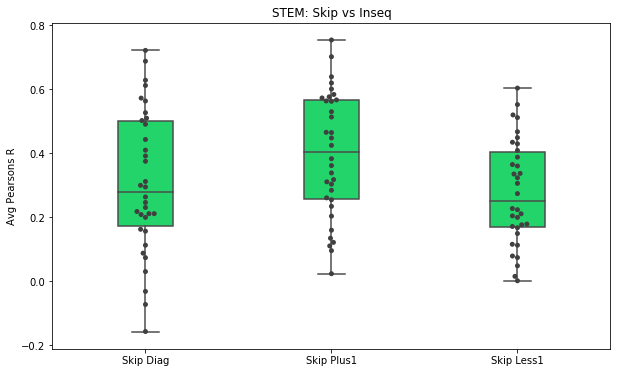

In [116]:
for key in ['skips_diag', 'skips_plus1', 'skips_less1']:
    print "Mean STEM {0}: ".format(key), np.mean(STEM_avg_df['{0}'.format(key)])
    print "STD STEM {0}: ".format(key), np.std(STEM_avg_df['{0}'.format(key)])
    print "Shapiro's Test of Normality:", stats.shapiro(STEM_avg_df['{0}'.format(key)])
    print "--------"
N = 3
conditions = ['Skip Diag', 'Skip Plus1', 'Skip Less1']
stem_allsubjs = [STEM_avg_df['skips_diag'], STEM_avg_df['skips_plus1'], STEM_avg_df['skips_less1']]
ind = np.arange(N)
fig, ax = plt.subplots(figsize = (10,6))
ax0 = sns.boxplot(data = stem_allsubjs, color = "#05f264", width = 0.3)
ax2 = sns.swarmplot(data = stem_allsubjs, color='.25')
ax.set_xticks(ind)
ax.set_xticklabels(conditions)
ax.set_ylabel("Avg Pearsons R")
ax.set_title("STEM: Skip vs Inseq")
plt.show()